# Tutorial: Redfield Homonuclear Dipolar Relaxation Hilbert Space
## PyOR Version: Jeener (release date not decided)
- Redfield Relaxation
- Homonuclear Dipolar Relaxation
- Hilbert Space
- Example for Three or Two spins
- Dipolar relaxation for any pair of spins (Need to make necessery changes in the source). By default three spin case is handled in the source code.

Author: Vineeth Thalakottoor \
Email: vineethfrancis.physics@gmail.com

## Import necessery packages and define source code of PyOR

In [29]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append('/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source')

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Generating Spin System
### Define Spin quantum numbers of individual spins
- if Spin_3_System = False, two spin system is defiend. If True, three spin system is treated.
- hbarEQ1 = True, hbar is treated as 1, therefore unit of Hamiltonian will be in angular frequency. If False unit of Hamiltonian will be in Joules.
- System = PyOR.Numerical_MR(Slist1,hbarEQ1), calling PyOR source code to the simulation.
- Sx,Sy,Sz = System.SpinOperator(), generating Sx, Sy and Sz spin operators of all spins.
- Sp,Sm = System.PMoperators(Sx,Sy), generating Sp and Sm spin operators of all spins.

In [30]:
Spin_3_System = False
if Spin_3_System:
    Slist1 = [1/2,1/2,1/2]
else: 
    Slist1 = [1/2,1/2]
    
hbarEQ1 = True    

System = PyOR.Numerical_MR(Slist1,hbarEQ1)
Sx,Sy,Sz = System.SpinOperator()
Sp,Sm = System.PMoperators(Sx,Sy)

## Generating Product operator basis (+-z basis)
- sort = 'negative to positive', sorting operators from negative to positive coherence order
- Index = False, If false dictionary (dic) of operators will have index, inorder to call your required basis operator
- Normal = True, If true, the all product operators will be normalized.
- Basis, coh, dic = System.ProductOperators_SpinHalf_PMZ(sort,Index,Normal), generate product operators (Basis), coherence order (coh) and dictionary of the product operators.
- OpB = System.String_to_Matrix(dic, Basis), for calling a particular product operator by the string index.

In [31]:
# Product Operators Basis
sort = 'negative to positive'
Index = False
Normal = True
Basis, coh, dic = System.ProductOperators_SpinHalf_PMZ(sort,Index,Normal)
OpB = System.String_to_Matrix(dic, Basis)

['Im1Im2', 'Im2', 'Im1', 'Im1Iz2', 'Iz1Im2', '', 'Iz2', 'Im1Ip2', 'Iz1', 'Iz1Iz2', 'Ip1Im2', 'Ip2', 'Iz1Ip2', 'Ip1', 'Ip1Iz2', 'Ip1Ip2']


In [32]:
# Matrix representation of 'Im1Im2'
Matrix(Basis[0])

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

In [33]:
print("Coherence order : ", coh)

Coherence order :  [-2, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2]


In [34]:
print("Dictionary of the product operators", dic)

Dictionary of the product operators ['Im1 Im2 ', 'Id1 Im2 ', 'Im1 Id2 ', 'Im1 Iz2 ', 'Iz1 Im2 ', 'Id1 Id2 ', 'Id1 Iz2 ', 'Im1 Ip2 ', 'Iz1 Id2 ', 'Iz1 Iz2 ', 'Ip1 Im2 ', 'Id1 Ip2 ', 'Iz1 Ip2 ', 'Ip1 Id2 ', 'Ip1 Iz2 ', 'Ip1 Ip2 ']


In [35]:
# calling product operator 'Im1Im2'
Matrix(OpB['Im1Im2'])

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

## Zeeman Halitonian in Rotating Frame
- Gamma = [System.gammaH1,System.gammaH1,System.gammaH1], gyromagnetic ratio of individual spins.
- B0 = 1.0, static magnetic field in Tesla.
- Offset = [10.0,10.0,60.0], precession frequency of individual spins in rotating frame. 
- LarmorF = System.LarmorFrequency(Gamma,B0,Offset), Larmor frequencies of individual spins
- OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0,-System.gammaH1*B0], define the angular frequency of the rotating frame
- Hz_lab = System.Zeeman(LarmorF,Sz), Zeeman Hamiltonina in lab frame
- Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF), Zeeman hamiltonina in rotating frame

In [36]:
# Gyromagnetic Ratio
if Spin_3_System:
    Gamma = [System.gammaH1,System.gammaH1,System.gammaH1]
else:
    Gamma = [System.gammaH1,System.gammaH1]
    
# B0 Field in Tesla, Static Magnetic field (B0) along Z
B0 = 1.0 

# Offset Frequency in Hz
if Spin_3_System:
    Offset = [10.0,10.0,60.0]
else:
    Offset = [10.0,60.0]
    
# generate Larmor Frequencies
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

# Rotating Frame Frequency
if Spin_3_System:
    OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0,-System.gammaH1*B0]
else:
    OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0]
    
# Lab Frame Hamiltonian
Hz_lab = System.Zeeman(LarmorF,Sz)

# Rotating Frame Hamiltonian
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

Larmor Frequency in MHz:  [-42.57745869 -42.57750869]


## J Coupling Hamiltonian
- Jlist[0][1] = 0.0, J coupling constant bewteen spin 1 and 2
- Jlist[0][2] = 0.0, J coupling constant bewteen spin 1 and 3
- Hj = System.Jcoupling(Jlist,Sx,Sy,Sz), J coupling Hamiltonian
- Hj = System.Jcoupling_Weak(Jlist,Sz), J coupling Hamiltonian (weak case)

In [37]:
if Spin_3_System:
    Jlist = np.zeros((len(Slist1),len(Slist1)))
    Jlist[0][1] = 0.0
    Jlist[0][2] = 0.0
    Jlist[1][2] = 0.0
else:
    Jlist = np.zeros((len(Slist1),len(Slist1)))
    Jlist[0][1] = 0.0

if True:
    Hj = System.Jcoupling(Jlist,Sx,Sy,Sz)
else:
    Hj = System.Jcoupling_Weak(Jlist,Sz)

## Initialize Density Matrix
- Individual_Spin_temperature = False, If True create initial and equlibrium density matrix (thermal), with spin temperature defined for individual spins.
- Thermal_DensMatrix = True, If true thermal density matrix will be calculated.

In [38]:
Individual_Spin_temperature = False
Thermal_DensMatrix = True

if Individual_Spin_temperature:  
    Tin = [300.0,300.0,300.0] # initial spin temperature in Kelvin 
    Tfi = [300.0,300.0,300.0] # final spin temperature in Kelvin
    HT_approx = False
    rho_in = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tin,HT_approx)  # Initial Density Matrix (Hyperpolarized)
    rhoeq = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tfi,HT_approx)   # Final Density Matrix (Thermal)    
else:  
    if Thermal_DensMatrix:    
        Hz_EnUnit = System.Convert_FreqUnitsTOEnergy(Hz_lab)
        HT_approx = False # High Temperature Approximation is False
        T = 300 # Temperature in Kelvin (milli Kelvin)
        T_thermal = 300.0 # Temperature in Kelvin
        rho_in = System.EqulibriumDensityMatrix(Hz_EnUnit,T,HT_approx)          # Initial Density Matrix (Hyperpolarized)
        rhoeq = System.EqulibriumDensityMatrix(Hz_EnUnit,T_thermal,HT_approx)   # Final Density Matrix (Thermal)   
    else:
        rho_in = 1 * np.sum(Sz,axis=0)
        rhoeq = 1 * np.sum(Sz,axis=0)        

Trace of density metrix =  0.9999999999999999
Trace of density metrix =  0.9999999999999999


## Initial Pulse
- hard_pulse = False, if true hard pulse, all spins will be rotated with equal angle.

In [39]:
flip_angle1 = 90.0 # Flip angle Spin 1 (or 2 and 3)
flip_angle2 = 90.0 # Flip angle Spin 2
flip_angle3 = 0.0 # Flip angle Spin 3

hard_pulse = False
if hard_pulse:
    rho = System.Rotate_H(rho_in,flip_angle1,np.sum(Sy,axis=0)) 
else:
    if Spin_3_System:
        rho = System.Rotate_H(rho_in,flip_angle1,Sy[0]) 
        rho = System.Rotate_H(rho,flip_angle2,Sy[1]) 
        rho = System.Rotate_H(rho,flip_angle3,Sy[2])
    else:    
        rho = System.Rotate_H(rho_in,flip_angle1,Sy[0]) 
        rho = System.Rotate_H(rho,flip_angle2,Sy[1])         

## Calculate Dipole coupling constant

In [40]:
# Dipole Coupling Constant
print(System.Dipole_Coupling_Constant(System.gammaH1,System.gammaH1,2.0e-10))

dipolar coupling constant (in Hz)
15006.857569508089


## Calculate eigen frequency of each product operator basis

In [41]:
# Eigen Frequency of product operator basis, "Iz1"
System.EigFreq_ProductOperator_H(Hz_lab,OpB["Iz1"])

Eigen Frequency in Hz


0.0

## Relaxation Constant
- Dipolar homonuclear relaxation
- options available (Hilbert space):
    - "No Relaxation"
    - "Phenomenological"
    - "Phenomenological Input"
    - "Auto-correlated Random Field Fluctuation"
    - "Phenomenological Random Field Fluctuation"
    - "Auto-correlated Dipolar Heteronuclear General Ernst" (more than one spin pair)
    - "Auto-correlated Dipolar Homonuclear Ernst" (one spin pair)
    - "Auto-correlated Dipolar Homonuclear General Ernst" (more than one spin pair)
- dipolar_relaxation = True, If true dipolar relaxation will be used    

In [42]:
dipolar_relaxation = True
if dipolar_relaxation:
    R1 = None  # unit: Hz
    R2 = None  # unit: Hz
    tau = 10.0e-12 # unit: s
    if Spin_3_System:
        bIS = [20.0e3,10.0e3,10.0e3] # unit: Hz (Spin 1 and 2, Spin 1 and 3, Spin 2 and 3)
        Rprocess = "Auto-correlated Dipolar Homonuclear General Ernst" 
    else:
        bIS = [20.0e3] # unit: Hz (Spin 1 and 2)
        Rprocess = "Auto-correlated Dipolar Homonuclear Ernst"
        
    System.Relaxation_Constants(R1,R2)
    System.Relaxation_Parameters(LarmorF, OmegaRF, tau, bIS)
    
    print("Larmor = ",LarmorF/(2*np.pi))    
    print("Product of Larmor and correlation time = ", abs(LarmorF*tau))
       
else:
    # Define longitudinal and transverse Relaxation
    T1 = 2 
    T2 = 2 
    R1 = 1.0/T1
    R2 = 1.0/T2
    System.Relaxation_Constants(R1,R2)
    Rprocess = "Phenomenological"   

Larmor =  [-42577458.68583003 -42577508.68583003]
Product of Larmor and correlation time =  [0.00267522 0.00267522]


## Calculate dipole relaxation rate
- System.RelaxationRate_H(Sz[0],Sz[0],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm), function to calculate different types of relaxation rate

In [43]:
if dipolar_relaxation:
    R1_rate = System.RelaxationRate_H(Sz[0],Sz[0],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
    Rcross_rate = System.RelaxationRate_H(Sz[0],Sz[1],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
    Longit_relaxa = R1_rate + Rcross_rate
    R2_rate = System.RelaxationRate_H(Sp[0],Sp[0],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
    print("T1 = %.5f and R1 = %.5f" % ((1.0/R1_rate).real, (R1_rate).real))
    print("T2 = %.5f and R2 = %.5f" % ((1.0/R2_rate).real, (R2_rate).real))
    print("Cross Relaxation rate = %.5f and time = %.5f" % (Rcross_rate.real, 1.0/Rcross_rate.real))
    print("Longitudinal Relaxation rate = %.5f and time = %.5f" % (Longit_relaxa.real, 1.0/Longit_relaxa.real))
    print("Spectral Density function = ", System.SpectralDensity(LarmorF[0],tau))

T1 = 6.33270 and R1 = 0.15791
T2 = 6.33265 and R2 = 0.15791
Cross Relaxation rate = 0.07895 and time = 12.66558
Longitudinal Relaxation rate = 0.23686 and time = 4.22182
Spectral Density function =  1.9999856864916188e-11


## Evolution (Need ODE Solver)

In [44]:
dt = 0.0001
AQ = 100.0
Npoints = int(AQ/dt)

ODE_complex_support = True
if ODE_complex_support:
    """
    DOP853 (better), BDF (not good for thermal polarization and small flip angle)
    other options: RK45, RK23
    """
    method = "ODE Solver"
    System.ODE_Method('DOP853') 

else:
    """
    Radau (implicit RK), LSODA
    """
    method = "ODE Solver Stiff RealIntegrator"
    System.ODE_Method('Radau')
    
start_time = time.time()
t, rho_t = System.Evolution_H(rhoeq,rho,Sx,Sy,Sz,Sp,Sm,Hz+Hj,dt,Npoints,method,Rprocess)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 68.8646137714386 seconds 


In [45]:
#plt.plot(t[i],System.RelaxationRate_H(Sz[0],rho_t[i],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm))

## Expectation Value

In [46]:
if Spin_3_System:
    det = np.sum(Sp,axis=0)
    deta = Sp[0]
    detb = Sp[1]
    detc = Sp[2] 

    det1 = np.sum(Sz,axis=0)
    det1a = Sz[0]
    det1b = Sz[1]
    det1c = Sz[2]

    t, signal = System.Expectation_H(rho_t,det,dt,Npoints)
    t, signala = System.Expectation_H(rho_t,deta,dt,Npoints)
    t, signalb = System.Expectation_H(rho_t,detb,dt,Npoints)
    t, signalc = System.Expectation_H(rho_t,detc,dt,Npoints)

    t, signal1 = System.Expectation_H(rho_t,det1,dt,Npoints)
    t, signal1a = System.Expectation_H(rho_t,det1a,dt,Npoints)
    t, signal1b = System.Expectation_H(rho_t,det1b,dt,Npoints)
    t, signal1c = System.Expectation_H(rho_t,det1c,dt,Npoints)
    
else:
    det  = (np.sum(Sp,axis=0))
    deta = (Sp[0] )
    detb = (Sp[1])

    det1 = (np.sum(Sz,axis=0))
    det1a = (Sz[0])
    det1b = (Sz[1])

    t, signal = System.Expectation_H(rho_t,det,dt,Npoints)
    t, signala = System.Expectation_H(rho_t,deta,dt,Npoints)
    t, signalb = System.Expectation_H(rho_t,detb,dt,Npoints)

    t, signal1 = System.Expectation_H(rho_t,det1,dt,Npoints)
    t, signal1a = System.Expectation_H(rho_t,det1a,dt,Npoints)
    t, signal1b = System.Expectation_H(rho_t,det1b,dt,Npoints)

## Save File

In [47]:
if False:
    np.savetxt('data.txt', signal.real, fmt='%1.20e', delimiter=',')

## Fourier Spectrum

In [48]:
fs = 1.0/dt
freq, spectrum = System.FourierTransform(signal,fs,5)

## Ploting

<IPython.core.display.Javascript object>


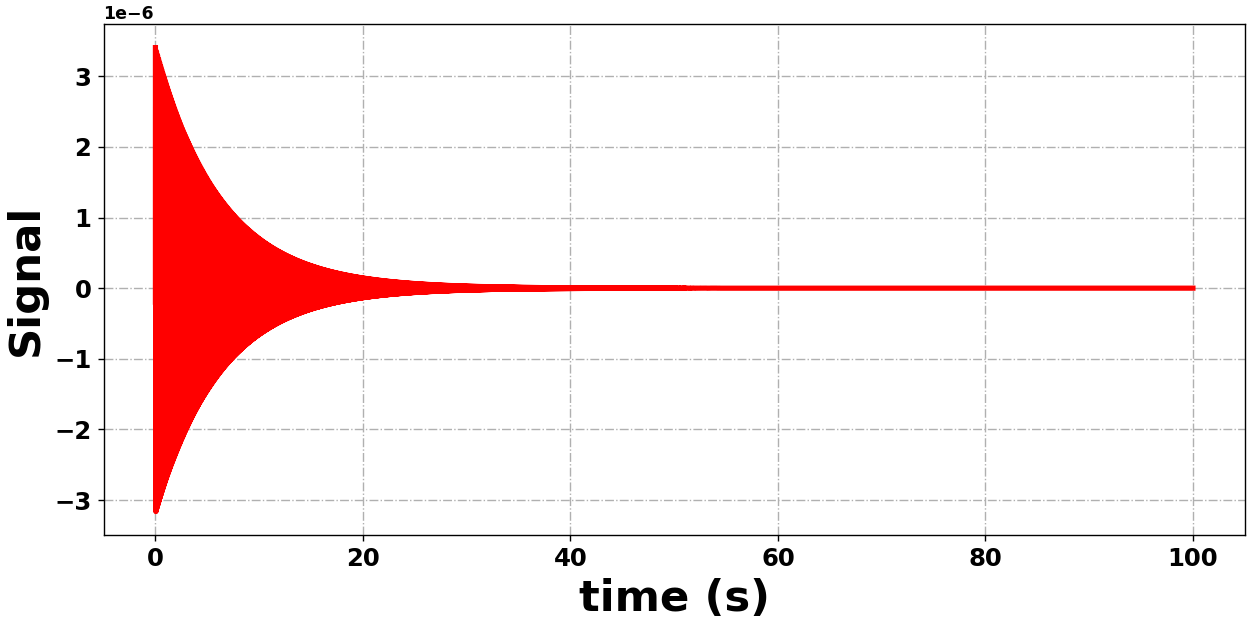

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [49]:
if Spin_3_System:
    System.Plotting(4,t,signal,"time (s)","Signal","red")
    
else:
    System.Plotting(4,t,signal,"time (s)","Signal","red")

<IPython.core.display.Javascript object>


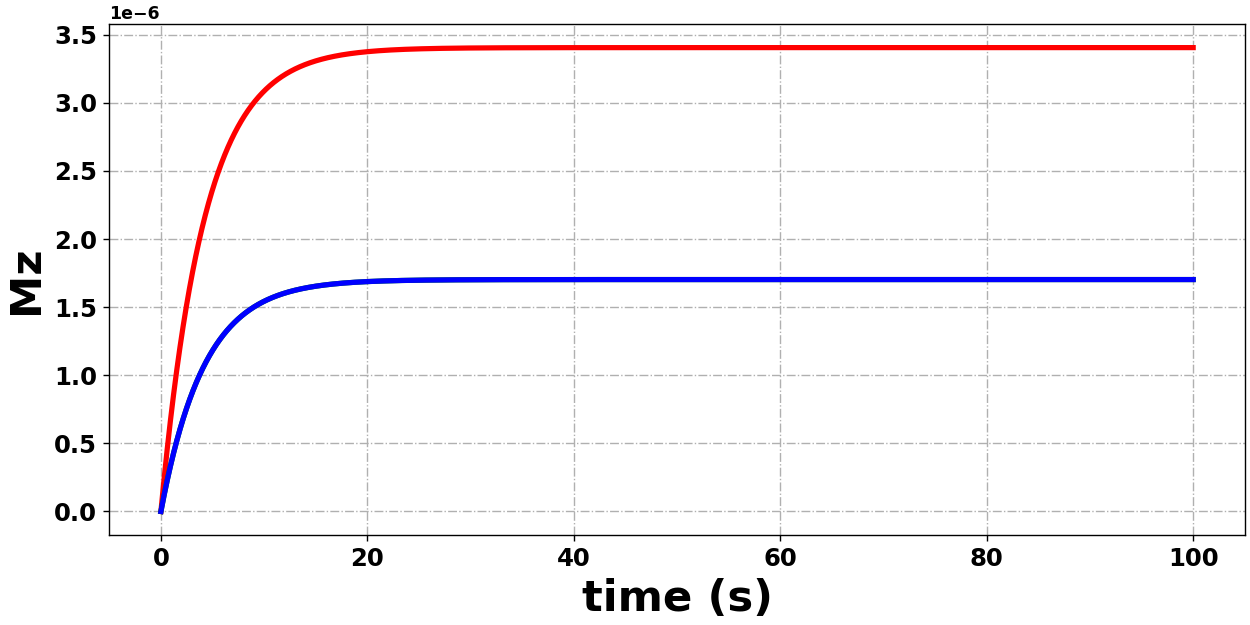

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [50]:
if Spin_3_System:    
    System.PlottingMulti(5,[t,t,t,t],[signal1,signal1a,signal1b,signal1c],"time (s)","Mz",["red","green","blue","black"])
    
else:    
    System.PlottingMulti(5,[t,t,t],[signal1,signal1a,signal1b],"time (s)","Mz",["red","green","blue","black"])

<IPython.core.display.Javascript object>


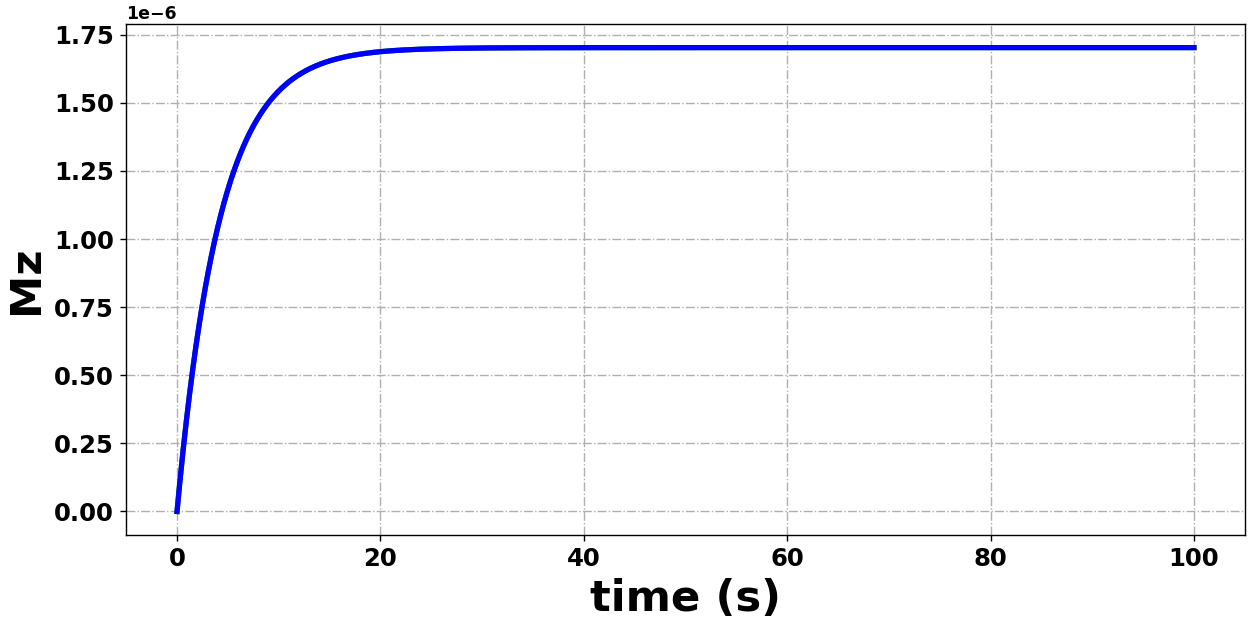

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [51]:
if Spin_3_System:
    System.PlottingMulti(6,[t,t,t],[signal1a,signal1b,signal1c],"time (s)","Mz",["green","blue","black"])
    
else:
    System.PlottingMulti(6,[t,t],[signal1a,signal1b],"time (s)","Mz",["green","blue","black"])

<IPython.core.display.Javascript object>


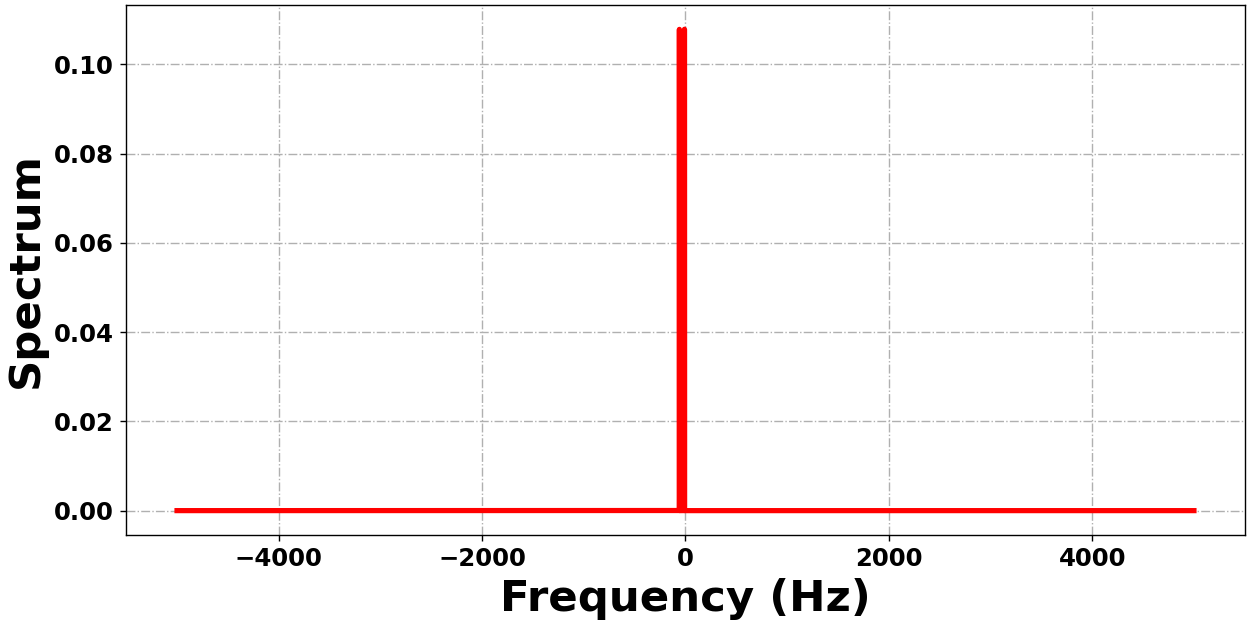

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [52]:
if Spin_3_System:
    System.Plotting(7,freq,(spectrum),"Frequency (Hz)","Spectrum","red")
    
else:
    System.Plotting(7,freq,(spectrum),"Frequency (Hz)","Spectrum","red")    

<IPython.core.display.Javascript object>


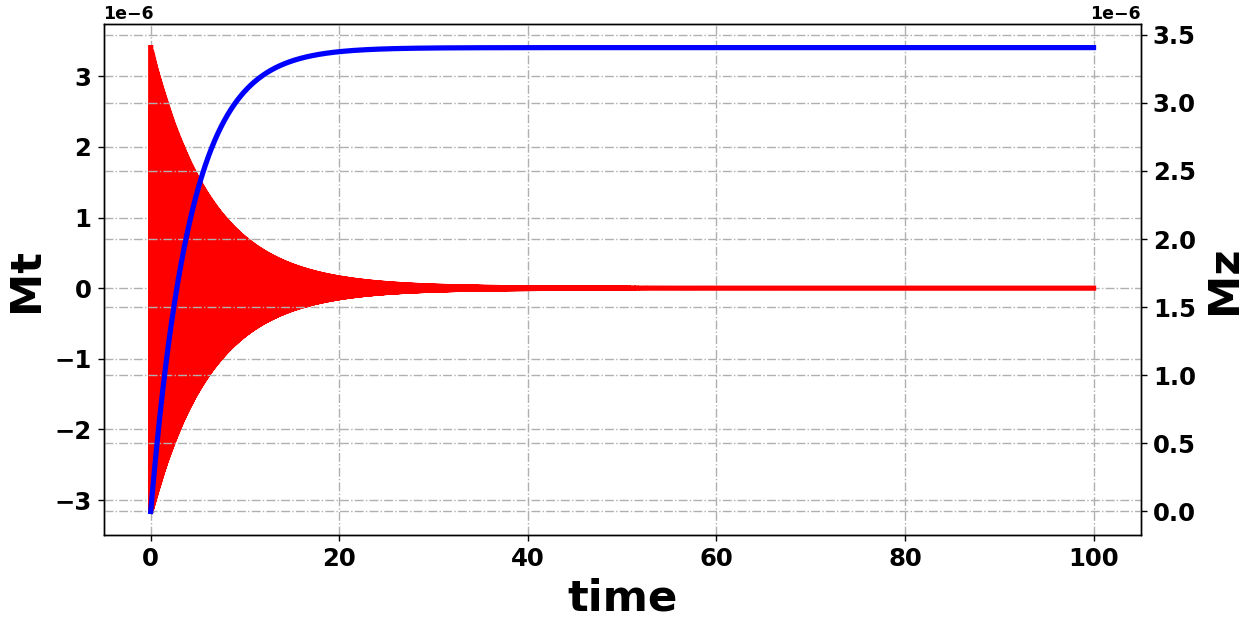

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [53]:
System.PlottingTwin(8,t,signal,signal1,'time','Mt','Mz',"red","blue")

<IPython.core.display.Javascript object>


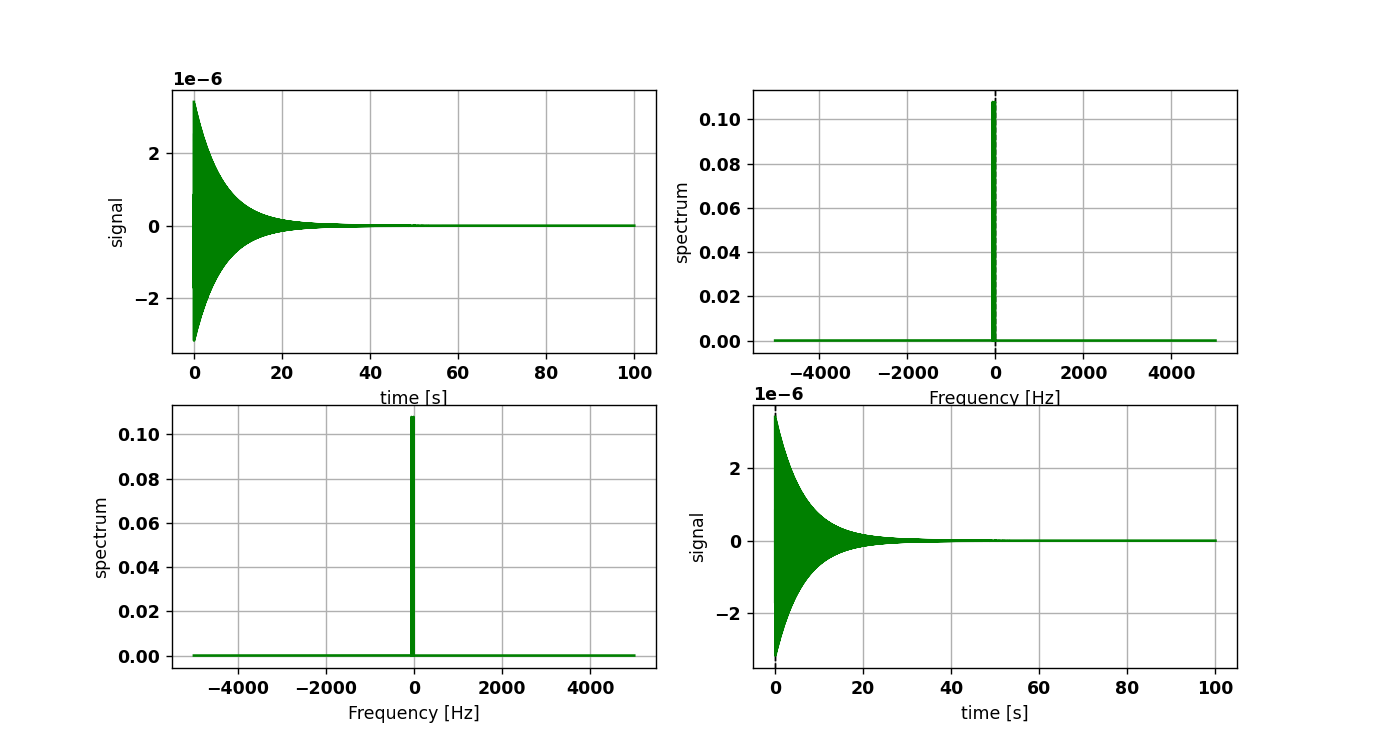

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [54]:
fig, fourier = System.PlottingMultimodeAnalyzer(t,freq,signal,spectrum)

## Fitting the longitudinal and transverse relaxation rate

In [55]:
Longitudinal = True
Relax_Fitting = True

if Relax_Fitting:
    if Longitudinal:
        popt, pcon = System.Fitting_LeastSquare(System.Exp_BuildUp,t,signal1b) # Longitudinal
        print("Longitudinal Relation rate = %.5f and time = %.5f" % (popt[1],1.0/popt[1]))
    else:
        popt, pcon = System.Fitting_LeastSquare(System.Exp_Decay,t,np.absolute(signalb).real) # Transverse
        print("Transverse Relation rate = %.5f and time = %.5f" % (popt[1],1.0/popt[1]))

Longitudinal Relation rate = 0.23686 and time = 4.22182


<IPython.core.display.Javascript object>


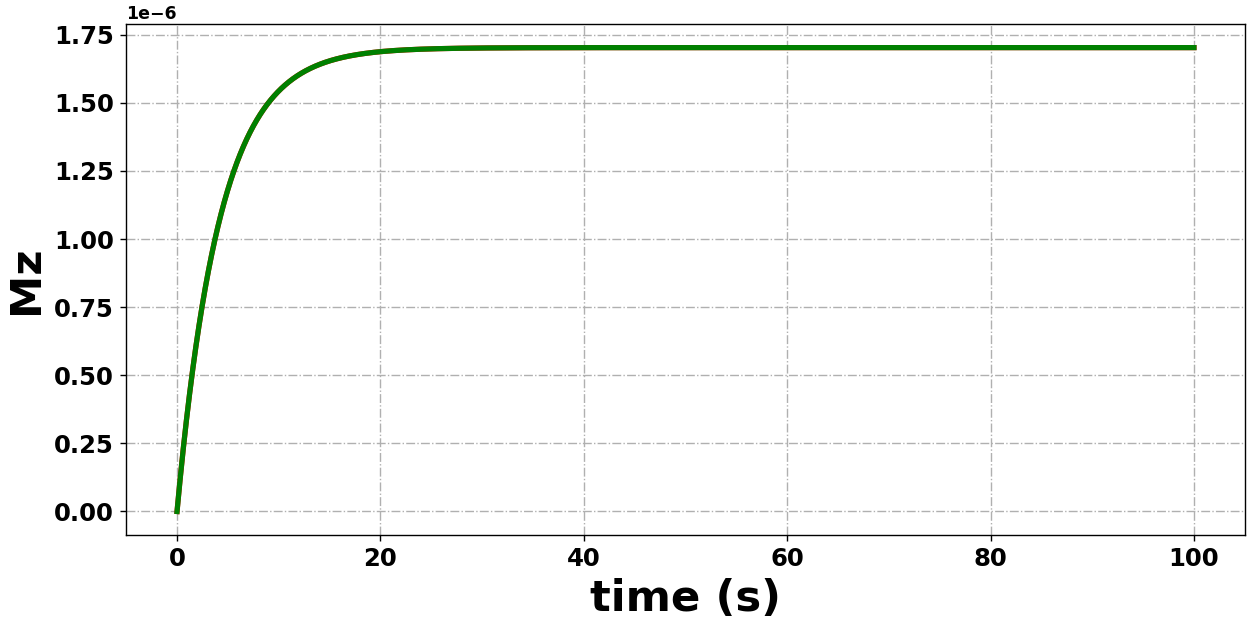

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


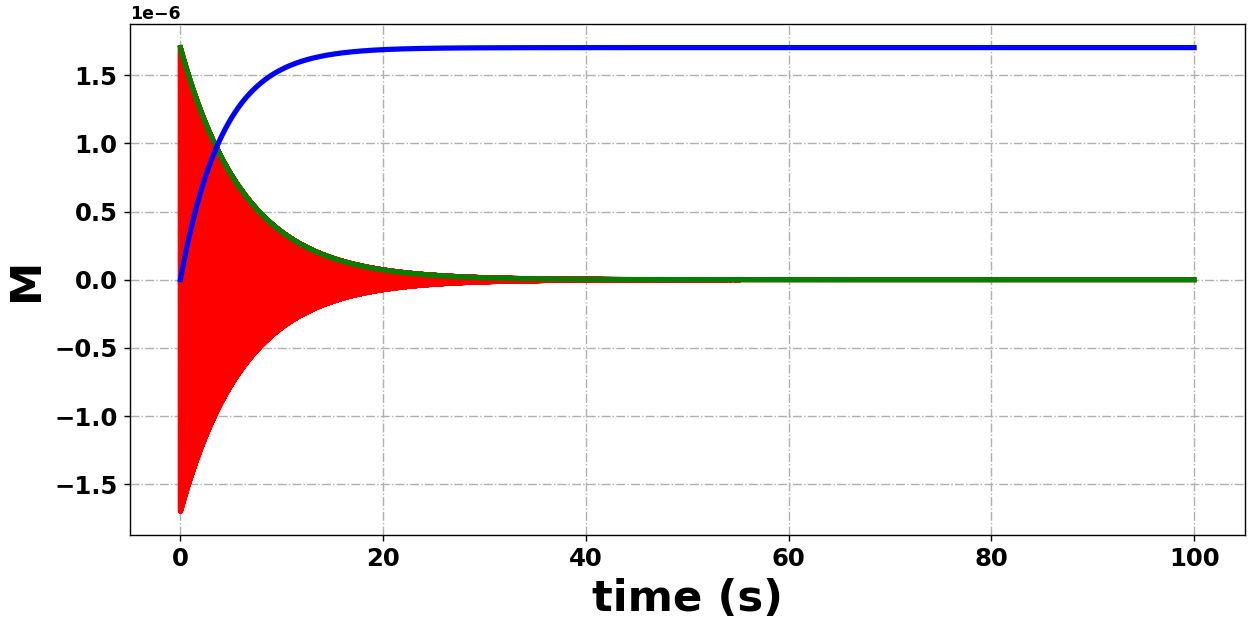

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [56]:
if Relax_Fitting:
    if Longitudinal:
        System.PlottingMulti(20,[t,t],[signal1b,System.Exp_BuildUp(t,*popt)],"time (s)","Mz",["red","green"]) # Longitudinal
    else:
        System.PlottingMulti(20,[t,t],[np.absolute(signalb),System.Exp_Decay(t,*popt)],"time (s)","Mt",["red","green"]) # Transverse

    System.PlottingMulti(21,[t,t,t],[signalb,np.absolute(signalb),signal1b],"time (s)","M",["red","green","blue"])

## Any suggestion? write to me
vineethfrancis.physics@gmail.com